# Machine Learning Homework 2

Michael Li

Oct 23, 2017

### Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### Q1 MNIST data exploration 

In [2]:
# load dataset
mnisttt = input_data.read_data_sets(".", one_hot=False)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [3]:
# define function to plot images
def image_plot(image, size):
    idxs = np.random.randint(len(image), size=size)
    plt.clf()
    f, axarr = plt.subplots(1, size, figsize = (20,20))
    for i in range(0,len(idxs)):
        X = mnisttt.train.images[idxs[i]]
        X = X.reshape([28, 28])
        axarr[i].imshow(X)
        axarr[i].set_axis_off()
    plt.show()

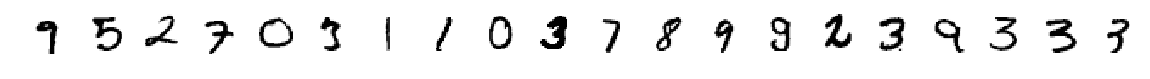

In [60]:
# plot 20 random images
image_plot(mnisttt.train.images, 20)

In [58]:
# combine images and labels together into a pandas dataframe
train_data = pd.DataFrame(mnisttt.train.images)
train_data['label'] = mnisttt.train.labels
train_data.shape

(55000, 785)

Use PCA to reduce dimension of dataset before visualization and correlation analysis

In [6]:
from sklearn.decomposition import PCA
# Create a Randomized PCA model that takes two components
randomized_pca = PCA(n_components=2, svd_solver='randomized')

# Fit and transform the data to the model
rpca = randomized_pca.fit_transform(mnisttt.train.images)

# Inspect the shape
rpca.shape

# Print out the data
print(rpca)

[[ 0.72487003  2.43285525]
 [ 0.47296006 -1.00537338]
 [-0.09389165  3.01016594]
 ..., 
 [-0.71020912  0.66499778]
 [ 0.4995764  -0.02673251]
 [-0.66687994 -0.0842952 ]]


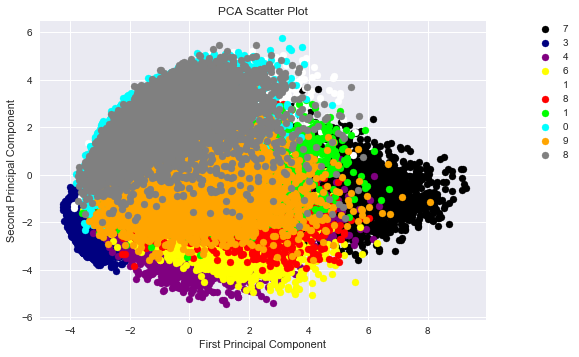

In [7]:
# show PCA scatter plot
plt.clf()
colors = ['black', 'navy', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = rpca[:, 0][mnisttt.train.labels == i]
    y = rpca[:, 1][mnisttt.train.labels == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(mnisttt.train.labels, bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

In [8]:
# compute digit-wised correlation
pca_df = pd.DataFrame(rpca)
pca_df['label'] = mnisttt.train.labels
corr_list = []
for i in range(0,10):
    temp = pca_df[pca_df['label'] == i]
    temp = temp.drop('label', 1)
    corr = temp.corr()
    corr_list.append(corr.loc[0,1])
corr_df = pd.DataFrame(corr_list, columns=['correlationCoefficient'])
corr_df['label'] = [x for x in range(0,10)]
corr_df

,correlationCoefficient,label
0,-0.203355,0
1,0.151664,1
2,0.048671,2
3,-0.417695,3
4,0.588714,4
5,-0.284004,5
6,0.321768,6
7,0.552747,7
8,0.129017,8
9,0.455305,9


In [159]:
# define a function to display digit-wised joint plot
def digit_joint_plot(df):
    plt.clf()
    for i in range(0,10):
        fig = sns.jointplot(x = df[df['label'] == i][0], y = df[df['label'] == i][1], kind = 'hex')
        plt.subplots_adjust(top=0.9)
        fig.fig.suptitle('digit ' + str(i) )
    plt.show()

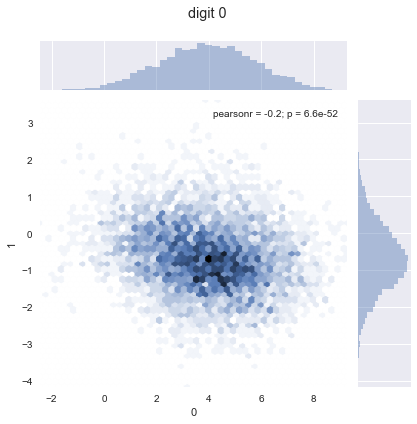

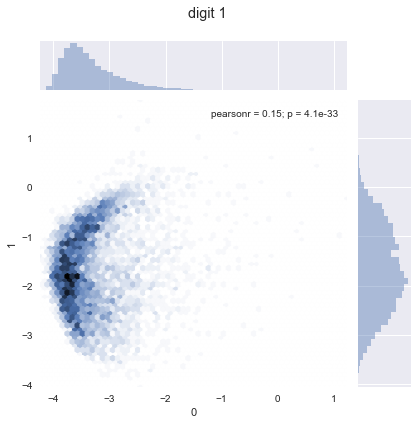

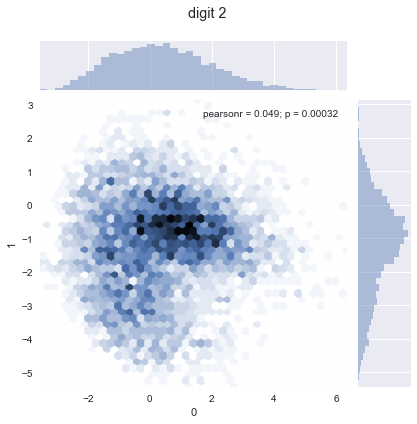

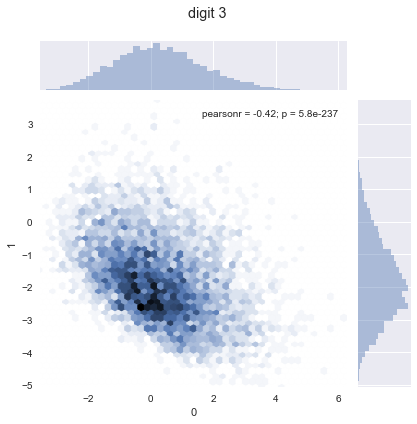

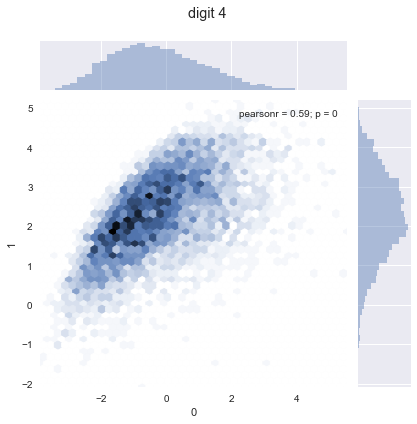

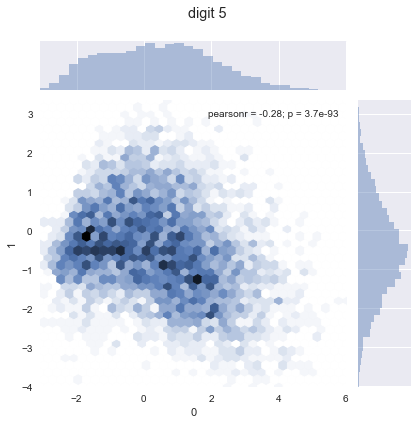

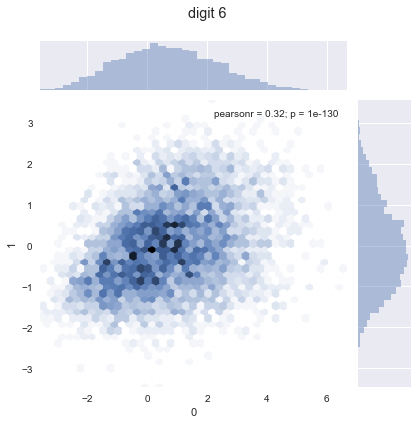

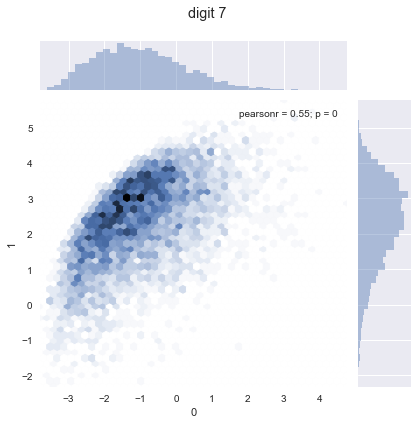

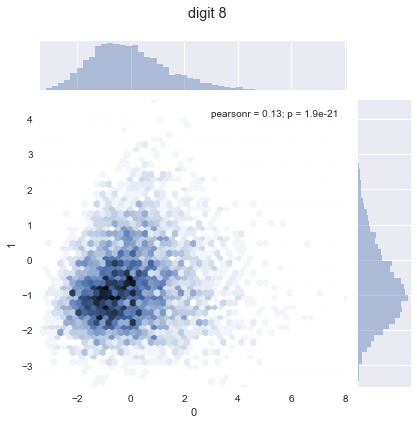

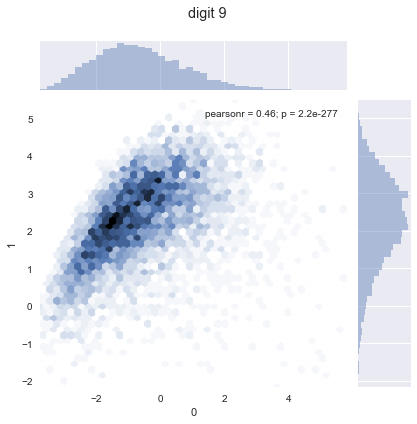

In [160]:
# since seaborn jointplot is not compatible with matplotlib's subplot function, the graphs can not be aligned aesthetically
digit_joint_plot(pca_df)

From the PCA scatter plot, it is easy to spot groups of dots with similar label, but they overlap at each other. The correlation of principle component for each digit is somewhat different, but not significant enough to be used as evidence of clear seperation. The joint plot of each digit clearly distinguishes from each other, as their distribution are quite different. 

### Q2 clustering MNIST digits 

#### Use K-means++ clustering algorithm on all features 

Preprocess dataset

In [49]:
# normalize training dataset
from sklearn.preprocessing import scale
train_data = scale(mnisttt.train.images)

/Users/Michael/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/Michael/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Use K-means++ to cluster MINIST digits

In [50]:
n_samples, n_features = train_data.shape
print('Number of samples:')
print(n_samples)
print('Number of features:')
print(n_features)
n_digits = len(np.unique(mnisttt.train.labels))
print('Number of groups:')
print(n_digits)

Number of samples:
55000
Number of features:
784
Number of groups:
10


In [51]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++', n_clusters=10, max_iter = 1000, random_state= 1)
clf.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [52]:
len(clf.cluster_centers_)

10

In [53]:
clf.labels_

array([7, 3, 6, ..., 2, 4, 2], dtype=int32)

In [54]:
clf.cluster_centers_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [55]:
mnisttt.train.labels

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

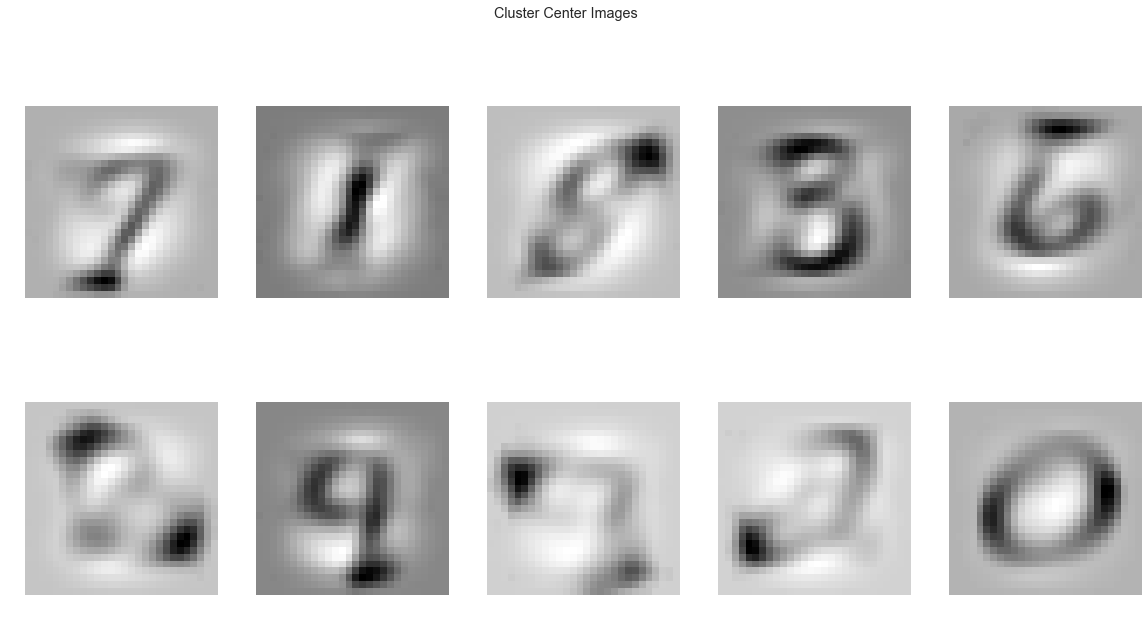

In [56]:
# Plot cluster images
plt.clf()
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Cluster Center Images')
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(clf.cluster_centers_[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.axis('off')
plt.show()

From the cluster images, digits can be vaguely recognized. But some of them are rather confusing, which means the quality of clustering model is not ideal.

Labels:

9; 1; 8; 3; 6

5; 4; 7; 2; 0

Evaluate clustering model

In [88]:
# define a function to change the cluster labels to its digits
def alter_label(x):
    if x == 0:
        y = 9
    elif x == 1:
        y = 1
    elif x == 2:
        y = 8
    elif x == 3:
        y = 3
    elif x == 4:
        y = 6
    elif x == 5:
        y = 5
    elif x == 6:
        y = 4
    elif x == 7:
        y = 7
    elif x == 8:
        y = 2
    elif x == 9:
        y = 0
    return y

In [89]:
from sklearn import metrics
eval_df = pd.DataFrame(clf.labels_, columns = ['cluster'])
eval_df['label'] = mnisttt.train.labels
eval_df['pred'] = eval_df['cluster'].apply(lambda x: alter_label(x))
eval_df.head(20)

,cluster,label,pred
0,7,7,7
1,3,3,3
2,6,4,4
3,4,6,6
4,1,1,1
5,2,8,8
6,1,1,1
7,9,0,0
8,6,9,4
9,3,8,3


In [90]:
# print the number of each label
eval_df['label'].value_counts()

1    6179
7    5715
3    5638
2    5470
9    5454
0    5444
6    5417
8    5389
4    5307
5    4987
Name: label, dtype: int64

In [91]:
# print the number of each prediction
eval_df['pred'].value_counts()

1    10079
3     8549
4     7842
9     5999
8     5976
6     5540
0     3466
5     3282
2     2753
7     1514
Name: pred, dtype: int64

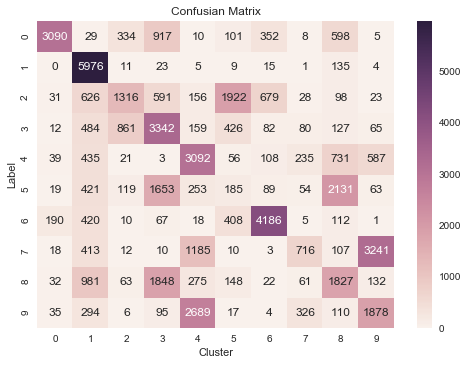

In [92]:
# plot confusian matrix in a heatmap
cfsmtrx = metrics.confusion_matrix(eval_df['label'], eval_df['pred'])

plt.clf()
fig = sns.heatmap(cfsmtrx, annot=True, fmt='d')
plt.subplots_adjust(top=0.9)
fig.set_title('Confusian Matrix')
fig.set_xlabel('Cluster')
fig.set_ylabel('Label')
plt.show()

It is clear that the number 1 and number 6 are best clusters. 

Number 7, 9, and 4 are easily misclustered. 

Number 5 is the most difficult one to cluster. 

### Q3 Stock price prediction with regression

In [93]:
# Load datasets
df_train = pd.read_csv('train_stock.csv')
df_test = pd.read_csv('test_stock.csv')

#### Data Exploration 

In [95]:
# Check if there is any difference between Close and Adj Close
df_train['diff_adj_cl'] = df_train['Close'] - df_train['Adj Close']
df_train['diff_adj_cl'].describe()

count    84.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: diff_adj_cl, dtype: float64

Since there is no difference between Close and Adj Close, these 2 columns can be treated as one

In [96]:
# Drop irrelevant columns
# Since the time series effect is not to be considered, thus the date column can be dropped
df_train = df_train.drop(['Adj Close', 'Date', 'diff_adj_cl'], axis=1)

In [98]:
# check the correlation between columns
df_train.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.995693,0.989009,0.985262,-0.400331
High,0.995693,1.000000,0.992536,0.994302,-0.415105
Low,0.989009,0.992536,1.000000,0.994452,-0.467211
Close,0.985262,0.994302,0.994452,1.000000,-0.455604
Volume,-0.400331,-0.415105,-0.467211,-0.455604,1.000000


It is clear that the prices have extremely high correlation between each other, while the volume is normally negatively correlated. Thus when designing the model, the prices can not appear together as features

In [108]:
# to prevent loss of information from deleting features, two new features can be derived from the prices
df_train['high_low'] = (df_train['High'] - df_train['Low'])/df_train['Low']
df_train['open_close'] = (df_train['Open'] - df_train['Close'])/df_train['Close']
df_test['high_low'] = (df_test['High'] - df_test['Low'])/df_test['Low']
df_test['open_close'] = (df_test['Open'] - df_test['Close'])/df_test['Close']

/Users/Michael/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


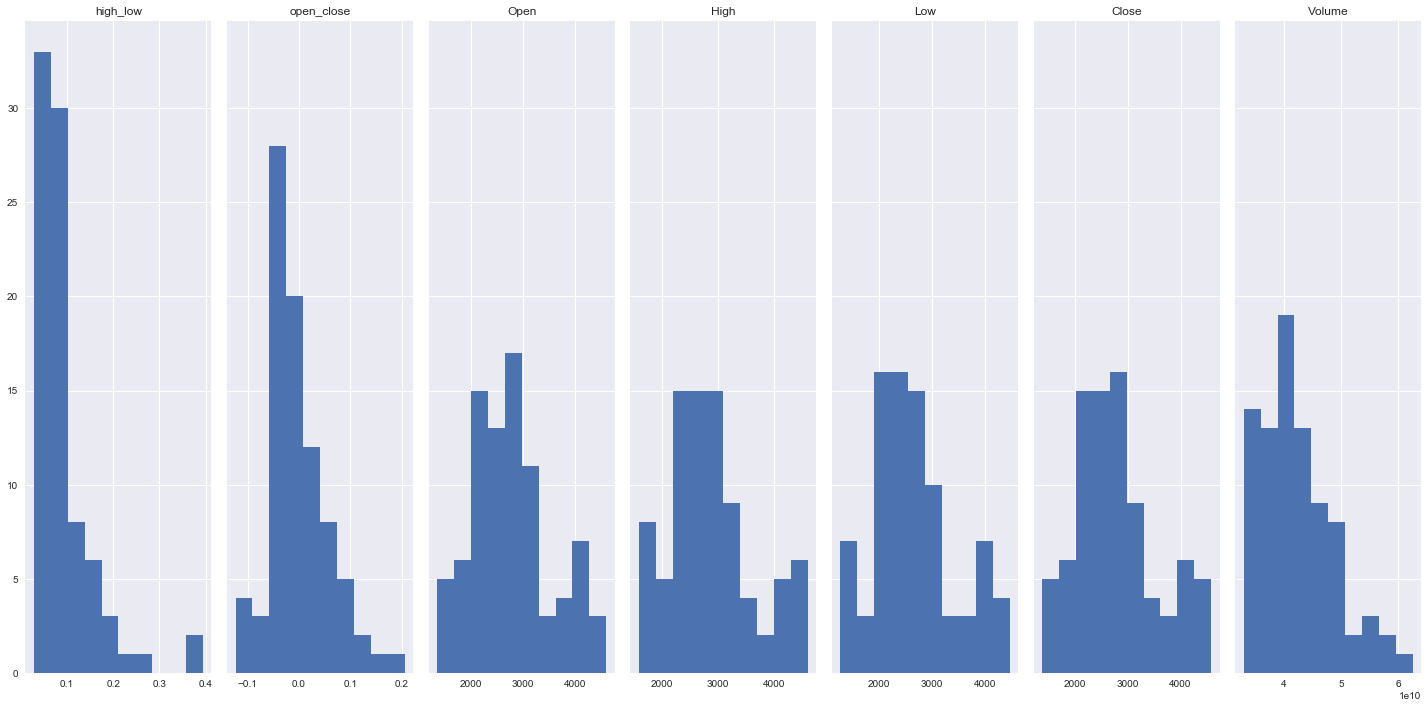

In [124]:
# plot the histograms of features
plt.clf()
fig, axs = plt.subplots(1, 7, sharey=True, tight_layout=True, figsize = (20,10))
n_bins = 10
axs[0].hist(df_train['high_low'], bins=n_bins)
axs[0].set_title("high_low")

axs[1].hist(df_train['open_close'], bins=n_bins)
axs[1].set_title("open_close")

axs[2].hist(df_train['Open'], bins=n_bins)
axs[2].set_title("Open")

axs[3].hist(df_train['High'], bins=n_bins)
axs[3].set_title("High")

axs[4].hist(df_train['Low'], bins=n_bins)
axs[4].set_title("Low")

axs[5].hist(df_train['Close'], bins=n_bins)
axs[5].set_title("Close")

axs[6].hist(df_train['Volume'], bins=n_bins)
axs[6].set_title("Volume")

plt.show()

#### Linear regression

In [134]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
def linear_reg(features, label):
    clf = linear_model.LinearRegression()
    clf.fit(df_train[features],df_train[label])
    # Test
    # Make predictions using the testing set
    pred = clf.predict(df_test[features])
    
    # The coefficients
    print('Coefficients: \n', features, '\n', clf.coef_)

    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(df_test[label], pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f \n' % r2_score(df_test[label], pred))

In [143]:
# the models are linear since they only use variables directly in linear regression model
feature_open = ['Open', 'Volume']
feature_high = ['High', 'Volume']
feature_low = ['Low', 'Volume']
feature_close = ['Close', 'Volume']

Linear model for close price

In [144]:
label_close = 'Close'

# use open price in regression model to predict close price
linear_reg(feature_open, label_close)

# use high price in regression model to predict close price
linear_reg(feature_high, label_close)

# use low price in regression model to predict close price
linear_reg(feature_low, label_close)

Coefficients: 
 ['Open', 'Volume'] 
 [  9.82265411e-01  -8.93446042e-09]
Mean squared error: 26248.18
Variance score: 0.91 

Coefficients: 
 ['High', 'Volume'] 
 [  9.98815775e-01  -6.35145570e-09]
Mean squared error: 8379.53
Variance score: 0.97 

Coefficients: 
 ['Low', 'Volume'] 
 [  1.01045300e+00   1.41441562e-09]
Mean squared error: 21363.84
Variance score: 0.93 



To predict the **close price**, using **high price, and volume** yields the best result with **0.97 accuracy.**

Linear model for open price

In [145]:
label_open = 'Open'

# use close price in regression model to predict open price
linear_reg(feature_close, label_close)

# use high price in regression model to predict open price
linear_reg(feature_high, label_close)

# use low price in regression model to predict open price
linear_reg(feature_low, label_close)

Coefficients: 
 ['Close', 'Volume'] 
 [  1.00000000e+00   1.75295460e-23]
Mean squared error: 0.00
Variance score: 1.00 

Coefficients: 
 ['High', 'Volume'] 
 [  9.98815775e-01  -6.35145570e-09]
Mean squared error: 8379.53
Variance score: 0.97 

Coefficients: 
 ['Low', 'Volume'] 
 [  1.01045300e+00   1.41441562e-09]
Mean squared error: 21363.84
Variance score: 0.93 



To predict the **open price**, using **close price, and volume** yields the best result with **1.00 accuracy.**

Linear model for high price

In [146]:
label_high = 'High'

# use close price in regression model to predict high price
linear_reg(feature_close, label_close)

# use open price in regression model to predict high price
linear_reg(feature_open, label_close)

# use low price in regression model to predict high price
linear_reg(feature_low, label_close)

Coefficients: 
 ['Close', 'Volume'] 
 [  1.00000000e+00   1.75295460e-23]
Mean squared error: 0.00
Variance score: 1.00 

Coefficients: 
 ['Open', 'Volume'] 
 [  9.82265411e-01  -8.93446042e-09]
Mean squared error: 26248.18
Variance score: 0.91 

Coefficients: 
 ['Low', 'Volume'] 
 [  1.01045300e+00   1.41441562e-09]
Mean squared error: 21363.84
Variance score: 0.93 



To predict the **high price**, using **close price, and volume** yields the best result with **1.00 accuracy.**

Linear model for low price

In [147]:
label_low = 'Low'

# use close price in regression model to predict low price
linear_reg(feature_close, label_close)

# use open price in regression model to predict low price
linear_reg(feature_open, label_close)

# use high price in regression model to predict low price
linear_reg(feature_high, label_close)

Coefficients: 
 ['Close', 'Volume'] 
 [  1.00000000e+00   1.75295460e-23]
Mean squared error: 0.00
Variance score: 1.00 

Coefficients: 
 ['Open', 'Volume'] 
 [  9.82265411e-01  -8.93446042e-09]
Mean squared error: 26248.18
Variance score: 0.91 

Coefficients: 
 ['High', 'Volume'] 
 [  9.98815775e-01  -6.35145570e-09]
Mean squared error: 8379.53
Variance score: 0.97 



To predict the **low price**, using **close price, and volume** yields the best result with **1.00 accuracy.**

Overall the close price has the best predictability on all other prices. 

The high price has better predictability on close price.

#### Nonlinear regression

In [142]:
# the models are nonlinear since they use percentage change of variables
feature_open = ['open_close', 'high_low', 'Open', 'Volume']
feature_high = ['open_close', 'high_low', 'High', 'Volume']
feature_low = ['open_close', 'high_low', 'Low', 'Volume']
feature_close = ['open_close', 'high_low', 'Close', 'Volume']

Nonlinear regression for closing price

In [138]:
label_close = 'Close'

# use open price in regression model to predict close price
linear_reg(feature_open, label_close)

# use high price in regression model to predict close price
linear_reg(feature_high, label_close)

# use low price in regression model to predict close price
linear_reg(feature_low, label_close)

Coefficients: 
 ['open_close', 'high_low', 'Open', 'Volume'] 
 [ -2.29301225e+03   2.62121336e+02   1.01431392e+00  -1.62683622e-09]
Mean squared error: 7756.72
Variance score: 0.97 

Coefficients: 
 ['open_close', 'high_low', 'High', 'Volume'] 
 [ -1.11502683e+03  -3.01357817e+02   9.96407481e-01  -1.28069373e-09]
Mean squared error: 4447.85
Variance score: 0.99 

Coefficients: 
 ['open_close', 'high_low', 'Low', 'Volume'] 
 [ -1.12533973e+03   1.25601618e+03   1.05676761e+00   6.14337395e-10]
Mean squared error: 10246.18
Variance score: 0.97 



To predict the **close price**, using **high price, high_low percentage change, open_close price change, and volume** yields the best result with **0.99 accuracy.**

Nonlinear regression for open price

In [139]:
label_open = 'Open'

# use close price in regression model to predict open price
linear_reg(feature_close, label_close)

# use high price in regression model to predict open price
linear_reg(feature_high, label_close)

# use low price in regression model to predict open price
linear_reg(feature_low, label_close)

Coefficients: 
 ['open_close', 'high_low', 'Close', 'Volume'] 
 [  1.63431395e-12  -2.74985301e-12   1.00000000e+00   5.30979106e-23]
Mean squared error: 0.00
Variance score: 1.00 

Coefficients: 
 ['open_close', 'high_low', 'High', 'Volume'] 
 [ -1.11502683e+03  -3.01357817e+02   9.96407481e-01  -1.28069373e-09]
Mean squared error: 4447.85
Variance score: 0.99 

Coefficients: 
 ['open_close', 'high_low', 'Low', 'Volume'] 
 [ -1.12533973e+03   1.25601618e+03   1.05676761e+00   6.14337395e-10]
Mean squared error: 10246.18
Variance score: 0.97 



To predict the **open price**, using **close price, high_low percentage change, open_close price change, and volume** yields the best result with **1.00 accuracy.**

Nonlinear regression for high price

In [140]:
label_high = 'High'

# use close price in regression model to predict high price
linear_reg(feature_close, label_close)

# use open price in regression model to predict high price
linear_reg(feature_open, label_close)

# use low price in regression model to predict high price
linear_reg(feature_low, label_close)

Coefficients: 
 ['open_close', 'high_low', 'Close', 'Volume'] 
 [  1.63431395e-12  -2.74985301e-12   1.00000000e+00   5.30979106e-23]
Mean squared error: 0.00
Variance score: 1.00 

Coefficients: 
 ['open_close', 'high_low', 'Open', 'Volume'] 
 [ -2.29301225e+03   2.62121336e+02   1.01431392e+00  -1.62683622e-09]
Mean squared error: 7756.72
Variance score: 0.97 

Coefficients: 
 ['open_close', 'high_low', 'Low', 'Volume'] 
 [ -1.12533973e+03   1.25601618e+03   1.05676761e+00   6.14337395e-10]
Mean squared error: 10246.18
Variance score: 0.97 



To predict the **high price**, using **close price, high_low percentage change, open_close price change, and volume** yields the best result with **1.00 accuracy.**

Nonlinear regression for low price

In [141]:
label_low = 'Low'

# use close price in regression model to predict low price
linear_reg(feature_close, label_close)

# use open price in regression model to predict low price
linear_reg(feature_open, label_close)

# use high price in regression model to predict low price
linear_reg(feature_high, label_close)

Coefficients: 
 ['open_close', 'high_low', 'Close', 'Volume'] 
 [  1.63431395e-12  -2.74985301e-12   1.00000000e+00   5.30979106e-23]
Mean squared error: 0.00
Variance score: 1.00 

Coefficients: 
 ['open_close', 'high_low', 'Open', 'Volume'] 
 [ -2.29301225e+03   2.62121336e+02   1.01431392e+00  -1.62683622e-09]
Mean squared error: 7756.72
Variance score: 0.97 

Coefficients: 
 ['open_close', 'high_low', 'High', 'Volume'] 
 [ -1.11502683e+03  -3.01357817e+02   9.96407481e-01  -1.28069373e-09]
Mean squared error: 4447.85
Variance score: 0.99 



To predict the **low price**, using **close price, high_low percentage change, open_close price change, and volume** yields the best result with **1.00 accuracy.**

Overall, the nonlinear models are not that different from linear models when predicting open, high, low prices, because the close price is too powerful and it alone can perfectly predict the prices. 

But when it comes to the prediction of close price, nonlinear model works better than linear model, because it includes information deleted in linear models. The prediction accuracy is 2% better than linear model, which is amazingly 99% accurate.